## Import Data

In [62]:
import tensorflow as tf

import pandas as pd
import numpy as np
import keras
import random
import cv2
import math
import seaborn as sns
import pickle

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Convolution2D, BatchNormalization
from tensorflow.keras.layers import Flatten, MaxPooling2D, Dropout, Input

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")

import gc

### Techniques to use: 

In [2]:
use_data_augmentation = False

## Data Loading 

In [3]:
pickle_in = open("x.pickle","rb")
x = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [4]:
np.set_printoptions(threshold=10)
x[0:1]

array([[[[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],

        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],

        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],

        ...,

        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],

        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],

        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]]]])

In [5]:
x.shape

(54355, 60, 60, 3)

## Train Test Split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15, random_state = 1)

In [7]:
#get the unique classes with set, and count them with len
K = len(set(y_train))
print("Unique classes: ", K)

Unique classes:  9


In [8]:
x_train.shape

(46201, 60, 60, 3)

In [9]:
x_train = x_train.reshape(-1,60,60,3)

In [10]:
x_train

array([[[[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],

        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],

        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],

        ...,

        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],

        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],

        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]]],


       [[[1., 0., 0.],
         [1., 0., 0.],
         [1., 

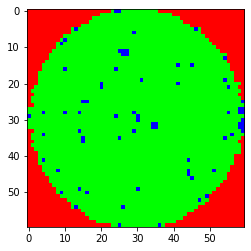

In [11]:
plt.imshow(x_train[100])
plt.show()

In [12]:
y

array([8, 3, 8, ..., 3, 8, 8], dtype=int64)

## Create Model

In [13]:
IMG_SIZE = 60

base_model = DenseNet121(weights="imagenet", include_top = False, input_shape = (IMG_SIZE,IMG_SIZE,3))

x = base_model.output

x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation = "relu")(x)
x = Dense(512, activation = "relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

preds = Dense(9, activation = 'softmax')(x)

model = Model(inputs = base_model.input, outputs = preds)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 60, 60, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 66, 66, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 30, 30, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 30, 30, 64)   256         ['conv1/conv[0][0]']             
                                                                                              

 conv2_block4_1_bn (BatchNormal  (None, 15, 15, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 15, 15, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block4_2_conv (Conv2D)   (None, 15, 15, 32)   36864       ['conv2_block4_1_relu[0][0]']    
                                                                                                  
 conv2_block4_concat (Concatena  (None, 15, 15, 192)  0          ['conv2_block3_concat[0][0]',    
 te)                                                              'conv2_block4_2_conv[0][0]']    
          

                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 7, 7, 128)   512         ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 7, 7, 128)   0           ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_2_conv (Conv2D)   (None, 7, 7, 32)     36864       ['conv3_block2_1_relu[0][0]']    
                                                                                                  
 conv3_block2_concat (Concatena  (None, 7, 7, 192)   0           ['conv3_block1_concat[0][0]',    
 te)      

 conv3_block6_2_conv (Conv2D)   (None, 7, 7, 32)     36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 7, 7, 320)   0           ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_block7_0_bn (BatchNormal  (None, 7, 7, 320)   1280        ['conv3_block6_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block7_0_relu (Activatio  (None, 7, 7, 320)   0           ['conv3_block7_0_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv3_block11_0_relu (Activati  (None, 7, 7, 448)   0           ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 7, 7, 128)    57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_block11_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv3_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_1_relu (Activati  (None, 7, 7, 128)   0           ['conv3_block11_1_bn[0][0]']     
 on)      

 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 3, 3, 320)   0           ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 3, 3, 128)    40960       ['conv4_block3_0_relu[0][0]']    
                                                                                                  
 conv4_block3_1_bn (BatchNormal  (None, 3, 3, 128)   512         ['conv4_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_blo

 conv4_block7_1_bn (BatchNormal  (None, 3, 3, 128)   512         ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 3, 3, 128)   0           ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_2_conv (Conv2D)   (None, 3, 3, 32)     36864       ['conv4_block7_1_relu[0][0]']    
                                                                                                  
 conv4_block7_concat (Concatena  (None, 3, 3, 480)   0           ['conv4_block6_concat[0][0]',    
 te)                                                              'conv4_block7_2_conv[0][0]']    
          

                                                                                                  
 conv4_block11_concat (Concaten  (None, 3, 3, 608)   0           ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 3, 3, 608)   2432        ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block12_0_relu (Activati  (None, 3, 3, 608)   0           ['conv4_block12_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block16_0_relu (Activati  (None, 3, 3, 736)   0           ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 3, 3, 128)    94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 3, 3, 128)   512         ['conv4_block16_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_1_relu (Activati  (None, 3, 3, 128)   0           ['conv4_block16_1_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block20_1_relu (Activati  (None, 3, 3, 128)   0           ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 3, 3, 32)     36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_block20_concat (Concaten  (None, 3, 3, 896)   0           ['conv4_block19_concat[0][0]',   
 ate)                                                             'conv4_block20_2_conv[0][0]']   
                                                                                                  
 conv4_block21_0_bn (BatchNorma  (None, 3, 3, 896)   3584        ['conv4_block20_concat[0][0]']   
 lization)

 ate)                                                             'conv4_block24_2_conv[0][0]']   
                                                                                                  
 pool4_bn (BatchNormalization)  (None, 3, 3, 1024)   4096        ['conv4_block24_concat[0][0]']   
                                                                                                  
 pool4_relu (Activation)        (None, 3, 3, 1024)   0           ['pool4_bn[0][0]']               
                                                                                                  
 pool4_conv (Conv2D)            (None, 3, 3, 512)    524288      ['pool4_relu[0][0]']             
                                                                                                  
 pool4_pool (AveragePooling2D)  (None, 1, 1, 512)    0           ['pool4_conv[0][0]']             
                                                                                                  
 conv5_blo

 conv5_block4_concat (Concatena  (None, 1, 1, 640)   0           ['conv5_block3_concat[0][0]',    
 te)                                                              'conv5_block4_2_conv[0][0]']    
                                                                                                  
 conv5_block5_0_bn (BatchNormal  (None, 1, 1, 640)   2560        ['conv5_block4_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block5_0_relu (Activatio  (None, 1, 1, 640)   0           ['conv5_block5_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block5_1_conv (Conv2D)   (None, 1, 1, 128)    81920       ['conv5_block5_0_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv5_block9_1_conv (Conv2D)   (None, 1, 1, 128)    98304       ['conv5_block9_0_relu[0][0]']    
                                                                                                  
 conv5_block9_1_bn (BatchNormal  (None, 1, 1, 128)   512         ['conv5_block9_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block9_1_relu (Activatio  (None, 1, 1, 128)   0           ['conv5_block9_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_blo

 conv5_block13_1_relu (Activati  (None, 1, 1, 128)   0           ['conv5_block13_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block13_2_conv (Conv2D)  (None, 1, 1, 32)     36864       ['conv5_block13_1_relu[0][0]']   
                                                                                                  
 conv5_block13_concat (Concaten  (None, 1, 1, 928)   0           ['conv5_block12_concat[0][0]',   
 ate)                                                             'conv5_block13_2_conv[0][0]']   
                                                                                                  
 conv5_block14_0_bn (BatchNorma  (None, 1, 1, 928)   3712        ['conv5_block13_concat[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 dropout_1 (Dropout)            (None, 512)          0           ['batch_normalization_1[0][0]']  
                                                                                                  
 dense_2 (Dense)                (None, 9)            4617        ['dropout_1[0][0]']              
                                                                                                  
Total params: 7,835,721
Trainable params: 7,749,001
Non-trainable params: 86,720
__________________________________________________________________________________________________


In [14]:
#Avoid Overfitting:

#for layer in model.layers[:-9]:
#    layer.trainable = False
#for layer in model.layers[-9:]:
#    layer.trainable = True

## Compile the Model

In [15]:
#Compile the model

model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 1)

## Data Augmentation 

In [16]:
#ImageDataGenerator requires 4 dimensions, including the color (greyscale or colored images)
if(use_data_augmentation):
    x_train = x_train.reshape(x_train.shape[0],IMG_SIZE,IMG_SIZE)

In [17]:
if(use_data_augmentation):
    batch_size = 64
    data_generator = tf.keras.preprocessing.image.ImageDataGenerator(#width_shift_range = 0.1, height_shift_range = 0.1,
                                                                     #vertical_flip = True,
                                                                     #rotation_range = 180,fill_mode = 'constant',
                                                                     zoom_range = 0.2,shear_range=0.2,horizontal_flip = True)
    train_generator = data_generator.flow(x_train,y_train,batch_size)
    steps_per_epoch = x_train.shape[0]//batch_size # divided twice by batch_size?

## Fit the model 

In [18]:
#Used with the Data Augmentation segment:

if(use_data_augmentation):
    anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2, verbose=1, min_lr=1e-3)
    checkpoint = ModelCheckpoint('model_densenet.h5', verbose=1, save_best_only=True)
    
    history = model.fit(train_generator, validation_data = [x_test, y_test], steps_per_epoch = steps_per_epoch, epochs = 50,
                 #callbacks = [anne, checkpoint])
                 callbacks = [callback])

In [19]:
#Used normally without Data Augmentation Segment:

if(not use_data_augmentation):
    history = model.fit(#x,y,
                        x_train, y_train, validation_data = [x_test,y_test], 
                        epochs= 20, verbose = 1, callbacks=[callback], batch_size = 64)

Epoch 1/20
722/722 [==============================] - 97s 113ms/step - loss: 0.3168 - accuracy: 0.9143 - val_loss: 0.1229 - val_accuracy: 0.9646
Epoch 2/20
722/722 [==============================] - 78s 108ms/step - loss: 0.1263 - accuracy: 0.9613 - val_loss: 0.2864 - val_accuracy: 0.9057
Epoch 3/20
722/722 [==============================] - 77s 106ms/step - loss: 0.1006 - accuracy: 0.9694 - val_loss: 0.0976 - val_accuracy: 0.9734
Epoch 4/20
722/722 [==============================] - 80s 111ms/step - loss: 0.0825 - accuracy: 0.9758 - val_loss: 0.0972 - val_accuracy: 0.9713
Epoch 5/20
722/722 [==============================] - 77s 107ms/step - loss: 0.0719 - accuracy: 0.9769 - val_loss: 0.1022 - val_accuracy: 0.9706
Epoch 6/20
722/722 [==============================] - 79s 110ms/step - loss: 0.0659 - accuracy: 0.9794 - val_loss: 0.0740 - val_accuracy: 0.9771
Epoch 7/20
722/722 [==============================] - 77s 106ms/step - loss: 0.0648 - accuracy: 0.9803 - val_loss: 0.2739 - val_ac

## Graphing the accuracies and losses 

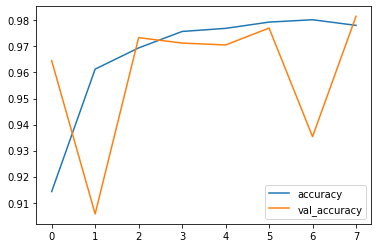

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

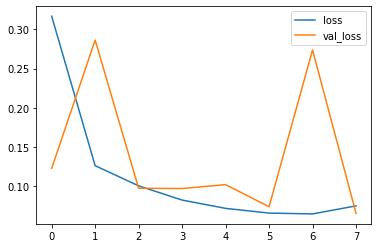

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()

## Evaluating model with training data 

In [22]:
### The way to measure the model performance

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

def evaluation_measurement(y_valid, y_pred, num_classes=9, output_fig=False):
    fpr = {}
    tpr = {}
    thresh ={}
    mcauc = []
    for i in range(num_classes):    
        fpr[i], tpr[i], thresh[i] = roc_curve(y_valid, y_pred[:, i], pos_label=i)
        auc_score = roc_auc_score(y_valid, y_pred, multi_class = 'ovr')  #'ovr'
        mcauc.append(auc_score)

    plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
    plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
    plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
    plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    
    print("MCAUC= ", np.mean(mcauc))
    
    if output_fig:
        plt.savefig('Multiclass ROC', dpi=300)

In [23]:
y_pred = model.predict(x_test)

MCAUC=  0.9951796734079219


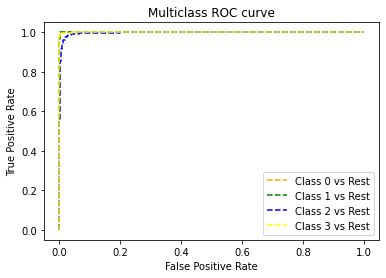

In [24]:
evaluation_measurement(y_test,y_pred)

In [25]:
y_test

array([2, 0, 3, ..., 8, 3, 8], dtype=int64)

In [26]:
y_pred

array([[1.40266266e-05, 2.35748976e-05, 9.60186481e-01, ...,
        6.77295320e-04, 2.16020017e-05, 1.08714594e-04],
       [9.99577701e-01, 6.70636427e-06, 4.83827853e-06, ...,
        2.60477873e-06, 4.80846666e-06, 7.22270030e-08],
       [4.46846434e-06, 1.16618066e-05, 3.81504826e-04, ...,
        2.66581210e-05, 1.39598169e-05, 1.73963281e-06],
       ...,
       [4.75853298e-13, 1.21249304e-11, 2.85108200e-12, ...,
        7.84135430e-12, 8.78891404e-10, 1.00000000e+00],
       [1.15985513e-10, 2.95025959e-09, 3.08598325e-09, ...,
        1.74111784e-11, 1.60651367e-10, 1.75837462e-27],
       [8.68447504e-23, 2.03549002e-20, 8.99796458e-23, ...,
        4.16538309e-21, 4.01143157e-16, 1.00000000e+00]], dtype=float32)

## Opening pickle with data for predictions 

In [27]:
pickle_in = open("x_to_predict.pickle","rb")
x_testing = pickle.load(pickle_in)

In [28]:
x_testing.shape

(118595, 60, 60, 3)

In [29]:
x_testing[0]

array([[[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]],

       ...,

       [[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]]])

## Predictions

In [30]:
len(x_testing)

118595

In [51]:
(118595/5), (118595/5)*2, (118595/5)*3, (118595/5)*4, 118595

94876.0

In [79]:
%%time
predictions = model.predict(x_testing[0:23719])

CPU times: total: 18.4 s
Wall time: 17.4 s


In [80]:
%%time
predictions2 = model.predict(x_testing[23719:47438])

CPU times: total: 18.1 s
Wall time: 17.1 s


In [81]:
predictions12_array = np.concatenate((predictions,predictions2),axis=0)
predictions12  = pd.DataFrame(predictions12_array, columns = ["Type 0", "Type 1", "Type 2", "Type 3", "Type 4", "Type 5", "Type 6", "Type 7", "Type 8"])
predictions12.to_csv('./uploads/predictions12.csv',index_label="Id")

In [82]:
del predictions, predictions2
gc.collect()

1402

In [65]:
%%time
predictions3 = model.predict(x_testing[47438:71157])

CPU times: total: 17.7 s
Wall time: 17 s


In [68]:
predictions3 = pd.DataFrame(predictions3, columns = ["Type 0", "Type 1", "Type 2", "Type 3", "Type 4", "Type 5", "Type 6", "Type 7", "Type 8"])
predictions3.to_csv('./uploads/predictions3.csv',index_label="Id")

In [ ]:
del predictions3
gc.collect()

In [70]:
%%time
predictions4 = model.predict(x_testing[71157:94876])

CPU times: total: 18.5 s
Wall time: 17.3 s


In [72]:
%%time
predictions5 = model.predict(x_testing[94876:118595])

CPU times: total: 18.1 s
Wall time: 17 s


In [74]:
predictions45_array = np.concatenate((predictions4,predictions5),axis=0)
predictions45 = pd.DataFrame(predictions45_array, columns = ["Type 0", "Type 1", "Type 2", "Type 3", "Type 4", "Type 5", "Type 6", "Type 7", "Type 8"])
predictions45.to_csv('./uploads/predictions45.csv',index_label="Id")

In [ ]:
del predictions4, predictions5
gc.collect()

In [141]:
excel12 = pd.read_csv("./uploads/predictions12.csv")
excel3 = pd.read_csv("./uploads/predictions3.csv")#,header=None)
excel45 = pd.read_csv("./uploads/predictions45.csv")#,header=None)

all_data = pd.concat([excel12,excel3,excel45],join='inner')
all_data.reset_index(inplace= True)
all_data = all_data.drop("Id", axis=1)
all_data = all_data.drop("index", axis=1)

In [142]:
all_data

Type 0    Type 1    Type 2        Type 3    Type 4    Type 5  \
0       0.000055  0.000015  0.000036  6.144044e-07  0.000159  0.000011   
1       0.000093  0.000046  0.000682  4.364870e-05  0.000150  0.000059   
2       0.000057  0.000016  0.000041  9.660013e-07  0.000069  0.000018   
3       0.000024  0.000010  0.000027  9.905586e-07  0.000018  0.000015   
4       0.000025  0.000009  0.000034  3.769630e-07  0.000093  0.000009   
...          ...       ...       ...           ...       ...       ...   
118590  0.000089  0.000079  0.902962  9.098409e-02  0.003645  0.000498   
118591  0.000374  0.000181  0.911934  7.045718e-02  0.008319  0.000838   
118592  0.000062  0.000056  0.002474  9.971412e-01  0.000060  0.000032   
118593  0.000054  0.000051  0.732061  2.660203e-01  0.001100  0.000352   
118594  0.000083  0.000075  0.007743  9.916629e-01  0.000108  0.000056   

          Type 6    Type 7    Type 8  
0       0.000082  0.000011  0.999630  
1       0.000233  0.000031  0.998664  
2       0.000046  0.000017  0.999736  
3       0.000028  0.000013  0.999865  
4       0.000047  0.000009  0.999775  
...          ...       ...       ...  
118590  0.001448  0.000073  0.000221  
118591  0.003800  0.000135  0.003962  
118592  0.000123  0.000043  0.000008  
118593  0.000237  0.000111  0.000015  
118594  0.000173  0.000070  0.000029  

[118595 rows x 9 columns]

## Uploading CSV 

In [143]:
all_data.to_csv("./uploads/all_predictions_#1.csv",index_label="Id")

In [145]:
import os
os.remove("./uploads/predictions12.csv")
os.remove("./uploads/predictions3.csv")
os.remove("./uploads/predictions45.csv")

# -------------------------------------------------- 